<h1 align = "center"><font>BEST MOVIE ANALYZER. ROAD TO THE MODEL</font></h1>

In [271]:
#All libs we are required (while project is not finished the list will become more biger!):
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

<h2 align = "center"><font>FIRST LOOK AT DATA</font></h2>
<h3 align = "center"><font color='#4e78f5'>Our dataset in general:</font></h3>

In [249]:
#First look at head of dataset:
movie_df_all = pd.read_csv('imdb_top_1000.csv')
movie_df_all.shape

(1000, 16)

In [250]:
movie_df_all.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<h3 align = "center"><font color='#4e78f5'>Clean information:</font></h3>

In [263]:
movie_df = movie_df_all.drop(columns = ['Poster_Link', 'Overview'])
movie_df['Gross'] =  movie_df['Gross'].str.replace(',','')
movie_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


<h2 align = "center"><font>CERTIFICATE FEATURE</font></h2>
<h3 align = "center"><font color='#6ad156'>One-hot-encoding certificate feature:</font></h3>

In [266]:
movie_df_ohe = pd.get_dummies(movie_df, columns = ['Certificate'])
movie_df_ohe

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,...,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,0,0,0,0,0,0,0,0,1,0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,...,0,0,0,0,0,0,0,0,0,0
996,Giant,1956,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,...,0,0,0,0,0,0,0,0,0,0
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,...,0,1,0,0,0,0,0,0,0,0
998,Lifeboat,1944,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,...,0,0,0,0,0,0,0,0,0,0


In [267]:
#Create my certificate system where M_A - middle audience. U_A - universal audience. A_A - adult audeince

#M_A
movie_df_ohe["Certificate_M_A"] = (movie_df_ohe["Certificate_U/A"] + movie_df_ohe["Certificate_UA"] 
+ movie_df_ohe["Certificate_Passed"] + movie_df_ohe["Certificate_TV-PG"] + movie_df_ohe["Certificate_PG-13"]
+ movie_df_ohe["Certificate_16"] + movie_df_ohe['Certificate_PG'])

#U_A
movie_df_ohe["Certificate_U_A"] = (movie_df_ohe["Certificate_TV-14"] + movie_df_ohe["Certificate_U"]
+ movie_df_ohe["Certificate_Approved"] + movie_df_ohe["Certificate_GP"] + movie_df_ohe["Certificate_G"])

#A_A
movie_df_ohe["Certificate_A_A"] = (movie_df_ohe["Certificate_R"] + movie_df_ohe["Certificate_Unrated"]
+ movie_df_ohe["Certificate_TV-MA"] + movie_df_ohe["Certificate_A"])

#Delete useless columns
movie_df_ohe = movie_df_ohe.drop(columns = ['Certificate_R', 'Certificate_Unrated', 'Certificate_TV-MA',
                                           'Certificate_A'])

movie_df_ohe = movie_df_ohe.drop(columns = ['Certificate_U/A', 'Certificate_UA', 'Certificate_Passed',
                                            'Certificate_TV-PG', 'Certificate_16', 'Certificate_PG-13',
                                           'Certificate_PG'])

movie_df_ohe = movie_df_ohe.drop(columns = ['Certificate_U', 'Certificate_TV-14', 'Certificate_Approved',
                                            'Certificate_GP', 'Certificate_G'])

In [268]:
#Current DataSet:
movie_df_ohe

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Certificate_M_A,Certificate_U_A,Certificate_A_A
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,0,0,1
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,0,0,1
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,1,0,0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,0,0,1
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,0,0,1
996,Giant,1956,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,0,1,0
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,1,0,0
998,Lifeboat,1944,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,0,0,0


In [269]:
movie_theory_U_A = movie_df_ohe
print("U_A count:", movie_theory_U_A['Certificate_U_A'].sum())

movie_theory_A_A = movie_df_ohe
print("A_A count:", movie_theory_A_A['Certificate_A_A'].sum())

movie_theory_M_A = movie_df_ohe
print("M_A count:", movie_theory_M_A['Certificate_M_A'].sum())
print("Nan count: 101")

U_A count: 260
A_A count: 345
M_A count: 294
Nan count: 101


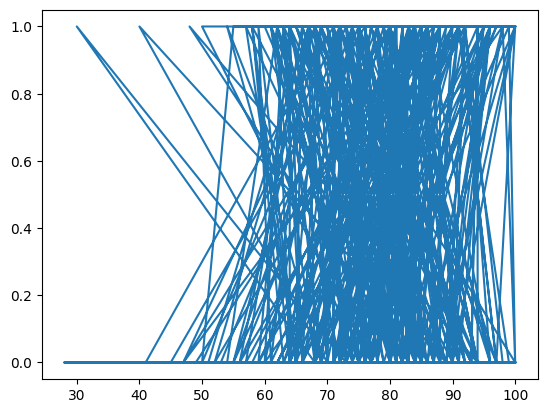

In [275]:
plt.plot(movie_df_ohe['Meta_score'], movie_df_ohe['Certificate_U_A'])
plt.show()